# Patient Melanoma Tumor Hypothesis Testing

## Table of Contents
1.[Problem Statement and Objectives](#Problem-Statement-and-Objectives)

2.[Data Overview](#Data-Overview)

3.[Data Importation](#Data-Importation)

4.[Importation of Packages](#Importation-of-Packages)

5.[Sanity Checks](#Sanity-Checks)

6.[Exploratory Data Analysis](#Exploratory-Data-Analysis)

7.[Hypothesis Testing](#Hypothesis-Testing)

6.[Conclusion](#Conclusion)




## Problem Statement and Objectives

The objective of this analysis is to check the survival rate of melanoma patients after tumour surgery at the Department of Plastic Surgery, University Hospital of Odense, Denmark during the period 1962 to 1977.

## Data Overview ###

The data consists of measurements made on patients with malignant melanoma. Each patient
had their tumour removed by surgery at the Department of Plastic Surgery, University Hospital
of Odense, Denmark during the period 1962 to 1977. The surgery consisted of complete
removal of the tumour together with about 2.5cm of the surrounding skin.
Among the measurements taken were the thickness of the tumour and whether it was
ulcerated or not. These are thought to be important prognostic variables in that patients with a
thick and/or ulcerated tumour have an increased chance of death from melanoma. Patients
were followed until the end of 1977. The data frame contains the following columns.

• time - Survival time in days since the operation.

• status - The patients status at the end of the study

1 indicates that they had died from melanoma, 2 indicates that they were still alive and 3
indicates that they had died from causes unrelated to their melanoma.

• sex - The patients sex; 1=male, 0=female.

• age - Age in years at the time of the operation.

• year - Year of operation.

• thickness - Tumour thickness in mm.

• ulcer - Indicator of ulceration; 1=present, 0=absent

## Importation of Packages

In [1]:
#importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin

## Data Importation

In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 5070-5205

 Directory of C:\Users\HP\Desktop\AI_Data Science\Python Projects

05/18/2024  05:22 AM    <DIR>          .
05/18/2024  05:22 AM    <DIR>          ..
05/17/2024  10:21 AM    <DIR>          .ipynb_checkpoints
03/29/2024  11:09 PM           579,797 Exercise melanoma data analysis.ipynb
04/02/2024  10:57 AM           845,288 Group 5- Mid-Course Project (Data Analysis Project.ipynb
03/27/2024  02:13 PM             5,127 melanoma.csv
04/13/2024  04:54 PM           721,857 Naadu-Mid-Course Project (Data Analysis Project) (1).ipynb
05/18/2024  05:22 AM            18,833 Patient Melanoma Tumor Hypothesis Testing.ipynb
03/30/2024  12:08 AM           291,223 Priscilla Naadu Lartey_Exercise melanoma data analysis.ipynb
03/25/2024  09:52 AM        12,033,474 superstore data .csv
               7 File(s)     14,495,599 bytes
               3 Dir(s)  378,112,430,080 bytes free


In [3]:
#loading melanoma csv file
melanoma_df = pd.read_csv('melanoma.csv')

## Exploratory Data Analysis ##

### Sanity Checks ##

In [4]:
melanoma_df.head()

,time,status,sex,age,year,thickness,ulcer
0,10,3,1,76,1972,6.76,1
1,30,3,1,56,1968,0.65,0
2,35,2,1,41,1977,1.34,0
3,99,3,0,71,1968,2.90,0
4,185,1,1,52,1965,12.08,1


In [5]:
melanoma_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       205 non-null    int64  
 1   status     205 non-null    int64  
 2   sex        205 non-null    int64  
 3   age        205 non-null    int64  
 4   year       205 non-null    int64  
 5   thickness  205 non-null    float64
 6   ulcer      205 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 11.3 KB


**Observation:**  Most of the data types in the dataset are integer values.

In [69]:
melanoma_df.describe()

,time,age,year,thickness,time_in_years
count,205.000000,205.000000,205.000000,205.000000,205.000000
mean,2152.800000,52.463415,1969.907317,2.919854,5.898082
std,1122.060667,16.671711,2.575563,2.959433,3.074139
min,10.000000,4.000000,1962.000000,0.100000,0.027397
25%,1525.000000,42.000000,1968.000000,0.970000,4.178082
50%,2005.000000,54.000000,1970.000000,1.940000,5.493151
75%,3042.000000,65.000000,1972.000000,3.560000,8.334247
max,5565.000000,95.000000,1977.000000,17.420000,15.246575


**Observation:** The mean survival time for patient is approximately 6 years. The maximum tumour thickness was 

In [7]:
melanoma_df.dtypes

time           int64
status         int64
sex            int64
age            int64
year           int64
thickness    float64
ulcer          int64
dtype: object

**Observation:** All the columns in the dataset contain numerical data types

In [8]:
melanoma_df.isna().sum()

time         0
status       0
sex          0
age          0
year         0
thickness    0
ulcer        0
dtype: int64

**Observation:** The dataset does not contain null values.

In [9]:
melanoma_df.shape

(205, 7)

**Observation:** The dataset consists of 205 rows and 7 columns.

### Feature Engineering

In [12]:
#changing ulcer data type
melanoma_df['ulcer'].replace({1:'Present', 0:'Absent'}, inplace = True)

In [10]:
#changing sex data types
melanoma_df['sex'].replace({1:'Male', 0:'Female'}, inplace = True)

In [13]:
#changing status data type
melanoma_df['status'].replace({1:'Died', 2:'Alive', 3:'Unrelated' }, inplace = True)

In [14]:
#Number of people who survived after the study
survivors = melanoma_df[melanoma_df['status']=='Alive']
total_survivors = survivors['status'].count()
print('The total number of people who survived after the study were',(total_survivors))


The total number of people who survived after the study were 134


In [71]:
#number of males who took part in the study
no_of_males = melanoma_df['sex'] == 'Male'
print('Number of males in the study is: {}'.format(melanoma_df[no_of_males]['sex'].count()))

Number of males in the study is: 79


In [70]:
#number of females who took part in the study
no_of_females = melanoma_df['sex'] == 'Female'
print('Number of females in the study is: {}'.format(melanoma_df[no_of_females]['sex'].count()))

Number of females in the study is: 126


### Univariate Analysis

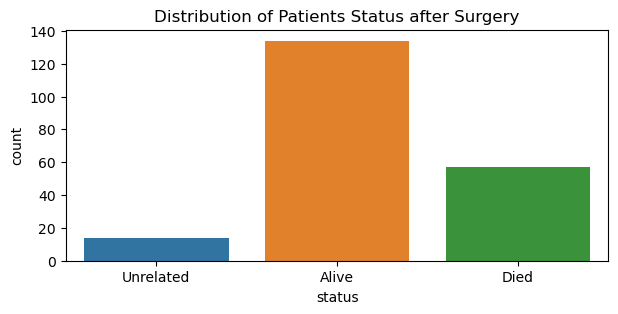

In [53]:
#showing distribution of patient status after surgery
plt.figure(figsize=(7,3))
sns.countplot(x=melanoma_df['status'])
plt.title('Distribution of Patients Status after Surgery')
plt.show()

**Observation:** The majority of patients survived after surgery

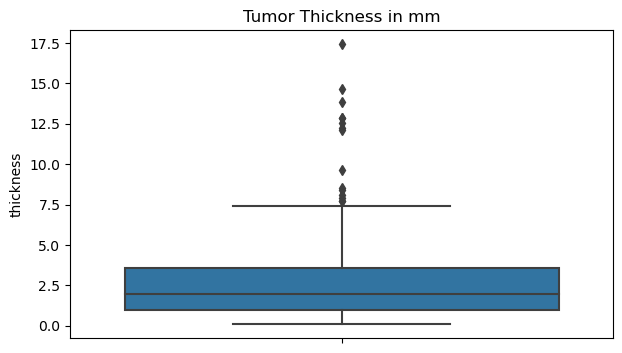

In [18]:
#univariate analysis of sex of patients
plt.figure(figsize=(7,4))
sns.boxplot(y= melanoma_df['thickness'])
plt.title('Tumor Thickness in mm')
plt.show()



**Observation:** There were outliers observed in the thickness column

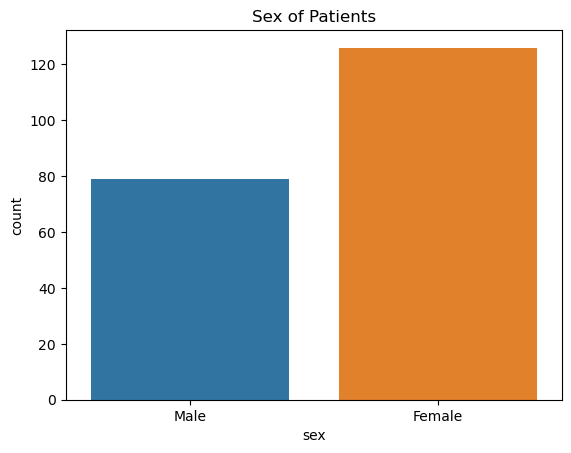

In [20]:
#univariate analysis of sex of patients
sns.countplot(x=melanoma_df['sex'])
plt.title('Sex of Patients')
plt.show()

**Observation:** The majority of melanoma patients were females.

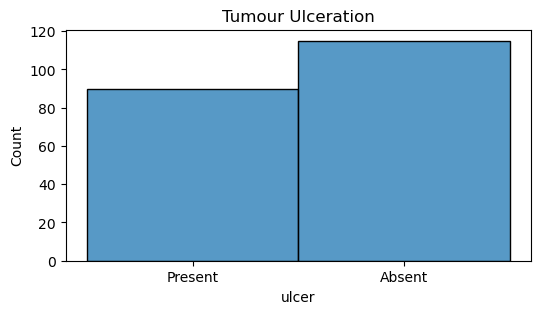

In [21]:
plt.figure(figsize=(6,3))
sns.histplot(melanoma_df['ulcer'])
plt.title('Tumour Ulceration')
plt.show()

**Observation:** Non-ulcerted tumour types were the most prevalent.

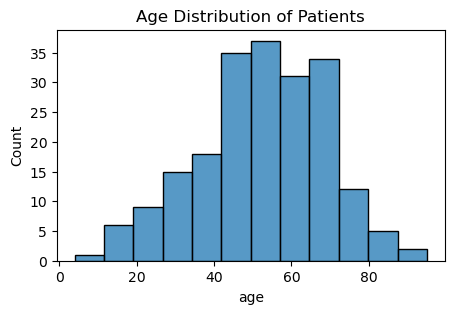

In [68]:
plt.figure(figsize=(5,3))
sns.histplot(melanoma_df['age'])
plt.title('Age Distribution of Patients')
plt.show()

**Observation:** The ages of patients were normally distributed 

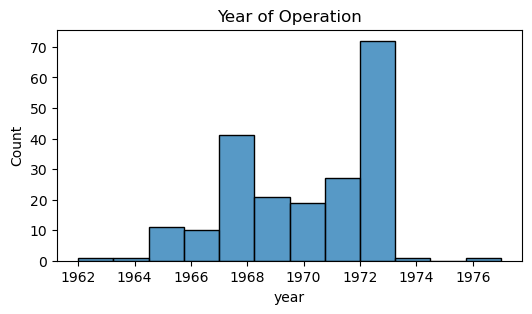

In [24]:
plt.figure(figsize=(6,3))
sns.histplot(melanoma_df['year'])
plt.title('Year of Operation')
plt.show()

**Observation:** Most of the surgeries for melanoma occurred between 1972 to 1974

[Back to Table of Contents](#Table-of-Contents)

### Bivariate Analysis

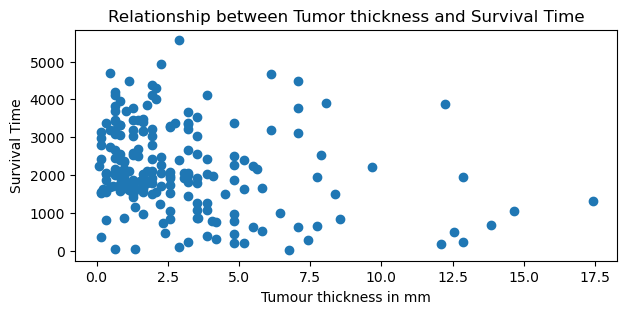

In [26]:
#showing relaionship between tumor thickness and survival time
fig, ax =plt.subplots(figsize=(7,3))
ax.scatter(melanoma_df['thickness'],
          melanoma_df['time'],
          marker = 'o')

ax.set_xlabel('Tumour thickness in mm')
ax.set_ylabel('Survival Time')
ax.set_title('Relationship between Tumor thickness and Survival Time')
plt.show()

**Observation:** 

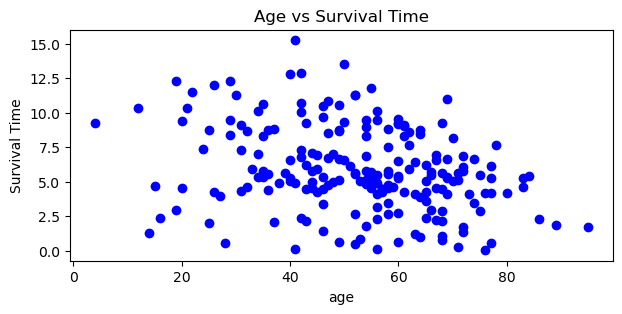

In [62]:
#showing relationship between age and survival time 
plt.figure(figsize =(7,3))
plt.scatter(melanoma_df['age'], melanoma_df['time_in_years'],
         color = 'b')
plt.title('Age vs Survival Time')
plt.xlabel('age')
plt.ylabel('Survival Time')
plt.show()

**Observation:** 

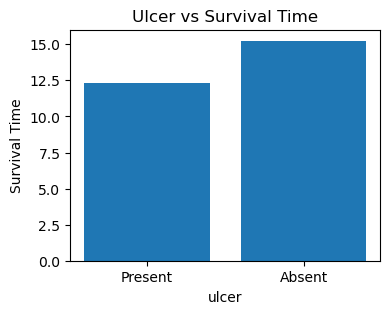

In [60]:
#showing relationship between ulceration and survival time
plt.figure(figsize =(4,3))
plt.bar(melanoma_df['ulcer'], melanoma_df['time_in_years'],
        )
plt.title('Ulcer vs Survival Time')
plt.xlabel('ulcer')
plt.ylabel('Survival Time')
plt.show()

**Observation:** Survival time was longer for patients without tumor ulcerations.

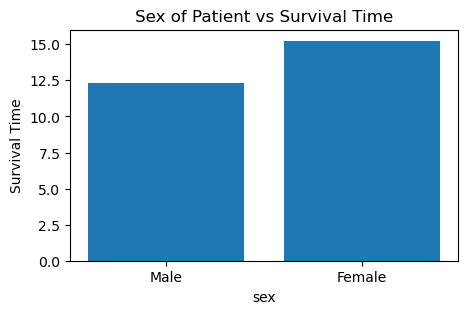

In [31]:
#showing relationship between sex and survival time
plt.figure(figsize =(5,3))
plt.bar(melanoma_df['sex'], melanoma_df['time_in_years'])
plt.title('Sex of Patient vs Survival Time')
plt.xlabel('sex')
plt.ylabel('Survival Time')
plt.show()

**Observation:** Survival time was longer for females than for males

### Multivariate Analysis

In [33]:
melanoma_df.head()

,time,status,sex,age,year,thickness,ulcer,time_in_years
0,10,Unrelated,Male,76,1972,6.76,Present,0.027397
1,30,Unrelated,Male,56,1968,0.65,Absent,0.082192
2,35,Alive,Male,41,1977,1.34,Absent,0.095890
3,99,Unrelated,Female,71,1968,2.90,Absent,0.271233
4,185,Died,Male,52,1965,12.08,Present,0.506849


C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


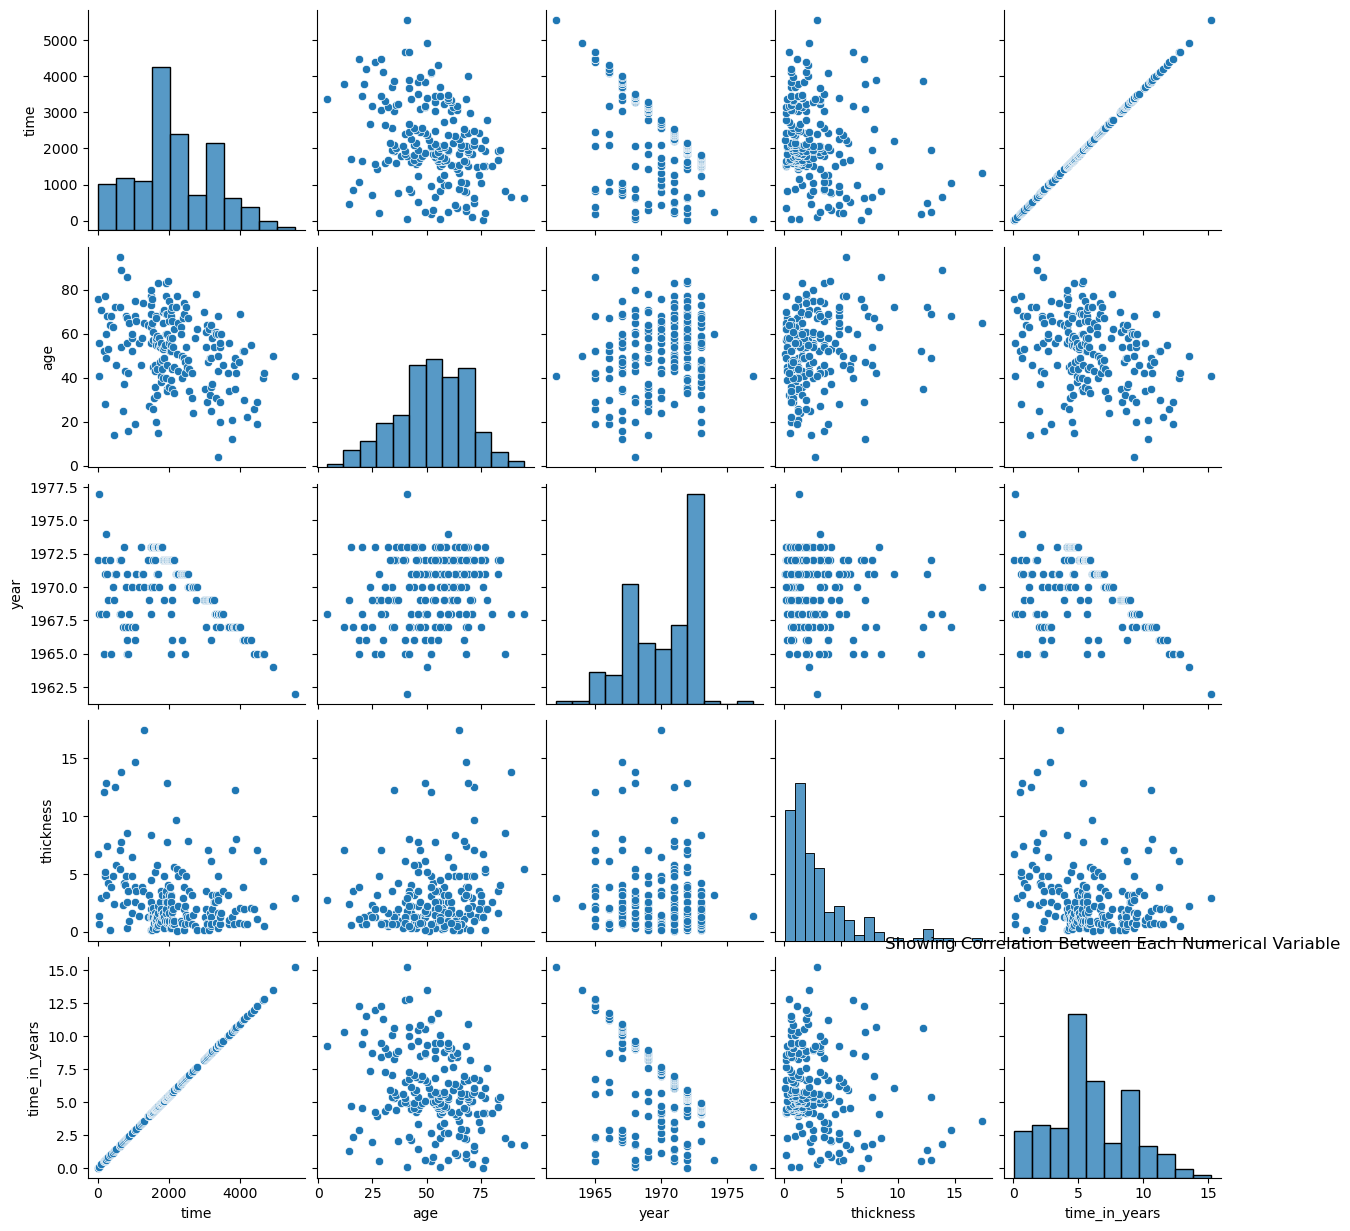

In [52]:
sns.pairplot(melanoma_df)
plt.title('Showing Correlation Between Each Numerical Variable')
plt.show()

[Back to Table of Contents](#Table-of-Contents)

## Hypothesis Testing

**Null Hypothesis:** There is no significant difference in survival time between patients with ulcerated and non-ulcerated tumour.

**Alternative Hypothesis**: Patients with non-ulcerated tumour have an increased survival time than patients with ulcerated tumour.

In [37]:
melanoma_df.groupby(['ulcer'])[ 'time'].mean()

ulcer
Absent     2414.965217
Present    1817.811111
Name: time, dtype: float64

In [38]:
ulcerated_tumour =  melanoma_df[melanoma_df['ulcer'] == 'Present']['time']

In [39]:
non_ulcerated_tumour = melanoma_df[melanoma_df['ulcer'] == 'Absent']['time']

In [40]:
ulcerated_tumour.sample(5)

200    4492
41     1271
101    1970
9       279
107    2038
Name: time, dtype: int64

In [41]:
non_ulcerated_tumour.sample(5)

83     1836
120    2156
2        35
71     1690
52     1542
Name: time, dtype: int64

In [42]:
ulcerated_tumour.mean()

1817.8111111111111

In [43]:
non_ulcerated_tumour.mean()

2414.965217391304

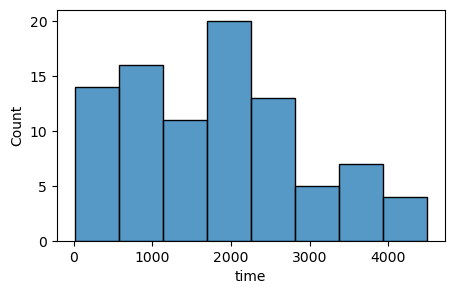

In [63]:
##checking for normal distribution of survival time mean for ulcerated_tumour
plt.figure(figsize =(5,3))
sns.histplot(ulcerated_tumour)
plt.show()

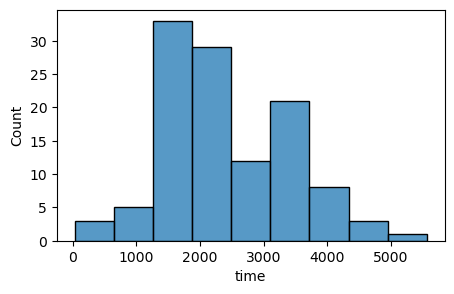

In [64]:
#checking for normal distribution of survival time mean for non_ulcerated_tumour
plt.figure(figsize =(5,3))
sns.histplot(non_ulcerated_tumour)
plt.show()

[Back to Table of Contents](#Table-of-Contents)

In [46]:
np.var(ulcerated_tumour)

1299433.6420987656

In [47]:
np.var(non_ulcerated_tumour)

1059891.146616257

In [48]:
#Rule of thump for equality of variance
np.var(ulcerated_tumour)/np.var(non_ulcerated_tumour)

1.2260066953547608

In [49]:
#Conducting independent t-test
test_results = pingouin.ttest(x=non_ulcerated_tumour,
                             y=ulcerated_tumour,
                             paired = False,
                             alternative = 'greater')

In [50]:
test_results

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,3.862857,181.104366,greater,0.000078,"[341.57, inf]",0.550534,279.424,0.987898


**alpha** = 0.05

**p-value** = 0.000078

Decision: At a significance level(alpha) of 0.05 and p-value of 0.000078 (p-value<alpha), we reject the null hypothesis and conclude that patients with non_ulcerated tumours have increased survival time than patients with ulcerated tumors


[Back to Table of Contents](#Table-of-Contents)

## Conclusion

After applyng t-test on the two groups of patients with ulcerated tumours and non ulcerated tumour, the results show a significance level of 0.05 and p-value of 0.000078. 

Hence we reject the null hypothesis that there is no significant difference in survival time between patients with ulcerated and non-ulcerated tumour and conclude that patients with non_ulcerated tumours have increased survival time than patients with ulcerated tumors.